### ECG Signal Classification (5 classes)
This file shows how  to load the data and get X_train, Y_train, X_test, Y_test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')
#no missing values in the data


In [ ]:
#convert dataframe to numpy array
X=X.values
X.shape

(3841, 187)

In [ ]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [ ]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

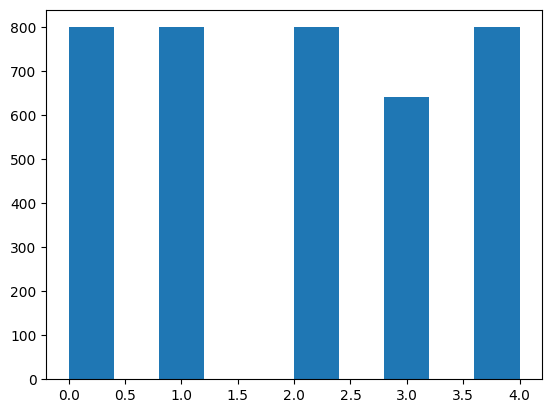

In [ ]:
plt.hist(Y)

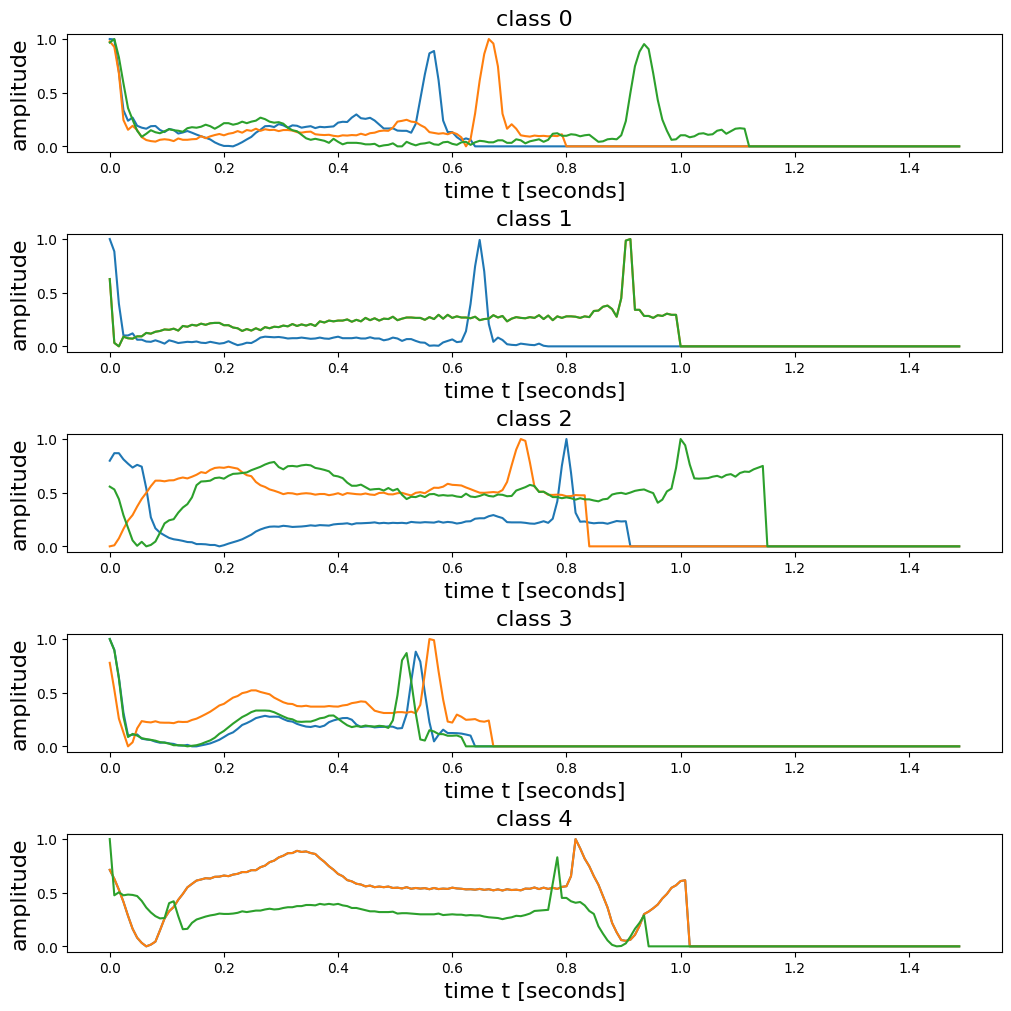

In [ ]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Split the data into a training set and a test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape
#3072 samples in the training set, each sample has 187 elements

(3072, 187)

In [ ]:
[X_train.min(), X_train.max()] #no need for normalization

[0.0, 1.0]

In [ ]:
Y_train.shape

(3072,)

In [ ]:
[Y_train.min(), Y_train.max()] #5 classes

[0, 4]

In [ ]:
X_test.shape
#769 samples in the training set, each sample has 187 elements

(769, 187)

In [ ]:
[X_test.min(), X_test.max()] #no need for normalization

[0.0, 1.0]

In [ ]:
Y_test.shape

(769,)

In [ ]:
[Y_test.min(), Y_test.max()] #5 classes

[0, 4]

#Get the validation set (in memory effieicent manner)

In [ ]:
numTrain = int(0.9 * X_train.shape[0]) # get 90% of the training data (80% of total data) to be for "pure" training
numTrain

2764

In [ ]:
# Get the indexes of all the training samples, shuffle them around
# then pick the first 90% for training and remaining 10% for validation
indexList = np.arange(0, X_train.shape[0])
np.random.shuffle(indexList)
trainIndex = indexList[0:numTrain]
valIndex = indexList[numTrain:]

#KNeighborsClassifier with Grid Search CV

In [ ]:
# Get a list of numbers to test for the best hyper-parameter and prepare for GridSearch
nNeighborsList = np.arange(1, 100, 5)
paramGrid = {"n_neighbors": nNeighborsList}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gsKnn = GridSearchCV(estimator=knn, param_grid=paramGrid, scoring='accuracy', cv=5)

In [ ]:
gsKnn.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='accuracy')

In [ ]:
knnValAcc = gsKnn.cv_results_['mean_test_score'] # Accuracy of validation set
knnValAcc

array([0.83528243, 0.81510077, 0.80468738, 0.79003628, 0.77245677,
       0.75845873, 0.74999603, 0.7464135 , 0.73990519, 0.72948863,
       0.72525834, 0.72232992, 0.71614629, 0.71158868, 0.70703106,
       0.70377691, 0.70214772, 0.70019279, 0.69791531, 0.69401075])

In [ ]:
# neighborsBest = nNeighborsList[np.argmax(knnValAcc)]
# neighborsBest

In [ ]:
gsKnn.best_params_

{'n_neighbors': 1}

In [ ]:
bestKnn = gsKnn.best_estimator_
bestKnn

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knnTrainAcc = bestKnn.score(X_train, Y_train)
knnTrainAcc

1.0

In [ ]:
knnTestAcc = bestKnn.score(X_test, Y_test)
knnTestAcc

0.881664499349805

#DecisionTreeClassifier with Grid Search CV

In [ ]:
# Get a list of numbers to test for the best hyper-parameter and prepare for GridSearch
maxDepthListDT = np.arange(1, 100, 5)
paramGridDT = {"max_depth": maxDepthListDT}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()
gsDT = GridSearchCV(estimator=dTree, param_grid=paramGridDT, scoring='accuracy', cv=5)

In [ ]:
gsDT.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='accuracy')

In [ ]:
DTValAcc = gsDT.cv_results_['mean_test_score']
DTValAcc

array([0.3639321 , 0.7812542 , 0.79850163, 0.80273563, 0.79426975,
       0.79655094, 0.80175578, 0.79655094, 0.7949228 , 0.79818119,
       0.80273298, 0.79785334, 0.7945923 , 0.80046132, 0.79980827,
       0.7955748 , 0.79980827, 0.79492174, 0.79622574, 0.80143164])

In [ ]:
gsDT.best_params_

{'max_depth': 16}

In [ ]:
bestDT = gsDT.best_estimator_
bestDT

DecisionTreeClassifier(max_depth=16)

In [ ]:
dTreeTrainAcc = bestDT.score(X_train, Y_train)
dTreeTrainAcc

0.998046875

In [ ]:
dTreeTestAcc = bestDT.score(X_test, Y_test)
dTreeTestAcc

0.8413524057217165

#RandomForestClassifier with Grid Search CV

In [ ]:
# Get a list of numbers to test for the best hyper-parameter and prepare for GridSearch
maxDepthListRF = np.arange(1, 100, 5)
paramGridRF = {"max_depth": maxDepthListRF}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rForest = RandomForestClassifier()
gsRF = GridSearchCV(estimator=rForest, param_grid=paramGridRF, scoring='accuracy', cv=5)

In [ ]:
gsRF.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='accuracy')

In [ ]:
RFValAcc = gsRF.cv_results_['mean_test_score']
RFValAcc

array([0.50943619, 0.80956648, 0.86783878, 0.87597839, 0.8710961 ,
       0.87532957, 0.87370038, 0.87337306, 0.87011997, 0.8756516 ,
       0.87467652, 0.87369455, 0.87304785, 0.87207224, 0.87304997,
       0.87793332, 0.87044517, 0.87760864, 0.87435449, 0.87597574])

In [ ]:
gsRF.best_params_

{'max_depth': 76}

In [ ]:
bestRF = gsRF.best_estimator_
bestRF

RandomForestClassifier(max_depth=76)

In [ ]:
rForestTrainAcc = bestRF.score(X_train, Y_train)
rForestTrainAcc

1.0

In [ ]:
rForestTestAcc = bestRF.score(X_test, Y_test)
rForestTestAcc

0.8998699609882965

#Compile and show all the results

In [ ]:
training_accuracy = [knnTrainAcc, dTreeTrainAcc, rForestTrainAcc]
test_accuracy = [knnTestAcc, dTreeTestAcc, rForestTestAcc]
rows = ["Training Accuracy", "Test Accuracy"]
cols = ["KNeighborsClassifier", "DecisionTreeClassifier","RandomForestClassifier"]

In [ ]:
results = pd.DataFrame((training_accuracy, test_accuracy), index=rows, columns=cols)
results.head()

,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
Training Accuracy,1.000000,0.998047,1.00000
Test Accuracy,0.881664,0.841352,0.89987
